In [1]:
import pt_keypattern
import numpy as np
import harmony_state
import pt_utils
import pt_musicutils
import pt_naming_conventions
import jupyter_pt_tools as jpt_pt
import IPython.display as ipd

import networkx as nx
import matplotlib.pyplot as plt

import itertools

from networkx.utils import pairwise

In [8]:
harmony_net = np.array([1, 12,7,7,7,7, 1])
harmony = harmony_state.harmony_state()

In [9]:
graph = nx.Graph()

for a_name in pt_naming_conventions.circle_fifth_notes():
    graph.add_node(a_name)

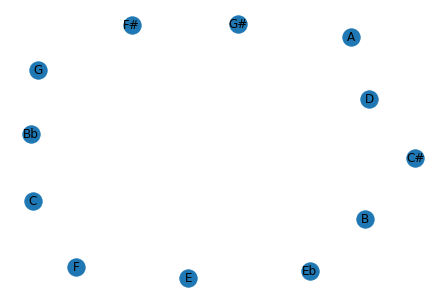

In [25]:
plt.figure()
nx.draw(graph, with_labels=True)
plt.show()

In [26]:
#G = nx.complete_multipartite_graph(harmony_net)

In [27]:
def multilayered_graph(*subset_sizes):
    extents = pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G


G = multilayered_graph(*harmony_net)

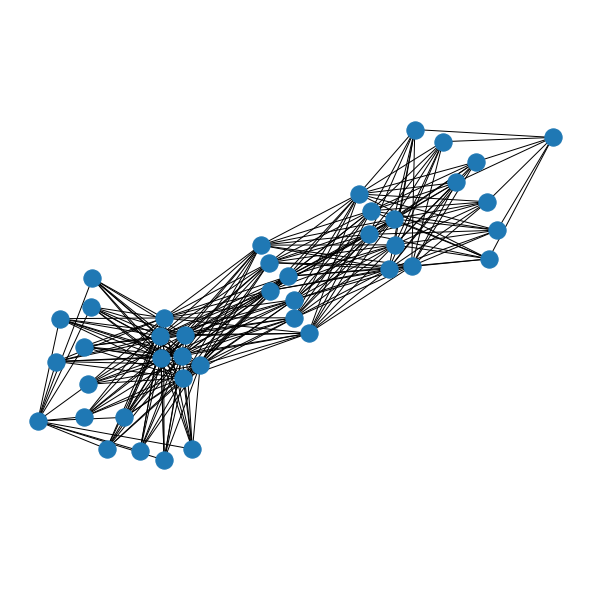

In [29]:
plt.figure(figsize=(8, 8))
nx.draw(G)
plt.axis("equal")
plt.show()